In [1]:
import os
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import h5py

import math
import ephem
from datetime import datetime, time, timedelta
from math import pi, cos, sin
from scipy import optimize
from joblib import Parallel, delayed
from mpl_toolkits.basemap import Basemap
# import xesmf as xr

%run diurnal_utils.py

In [2]:
model_dir = '/export/data1/cchristo/gpm_data/gpmdata/'
# model_dir = '/export/data1/cchristo/gpm_data/gpmdata_regridded_gfdl_cm4/'

result = [y for x in os.walk(model_dir) for y in glob(os.path.join(x[0], '*.nc'))]
result = sorted(result)

<xarray.DataArray 'precipitationCal' ()>
array(-9999.9, dtype=float32)


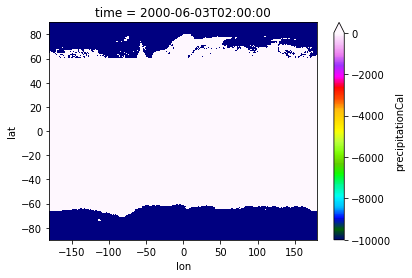

In [3]:
# ds = xr.open_mfdataset(result, combine='nested', concat_dim = 'time')
# ds = xr.open_dataset(result[0],  engine = 'h5netcdf')
ds = xr.open_dataset(result[100])
# ds = ds.sel(lat= slice(-60, 60))
ds['precipitationCal'].isel(time = 0).plot.imshow(vmin =-10000, vmax = 0, cmap = plt.get_cmap('gist_ncar'))
np.count_nonzero(np.isnan(ds['precipitationCal'].values))
print(ds['precipitationCal'].min())



In [75]:
# ds['precipitationCal']

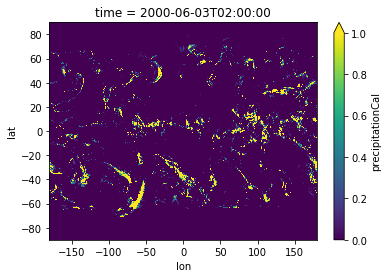

In [70]:
ds['precipitationCal'].where(ds['precipitationCal'] >0, 0).isel(time = 0).plot.imshow(vmax = 1)

In [82]:
# ds['lon'] = ds['lon'].where(ds['lon'] > 0, ds['lon'] + 360)

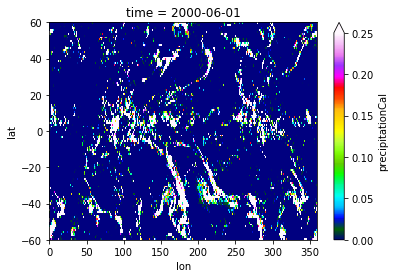

In [5]:
ds = ds.sel(time = slice('2000-06', '2004-10'))
ds = ds.sel(lat= slice(-60, 60))

In [24]:
# ds_mean = ds['precipitationCal'].mean(dim = 'time')
# ds_mean.load()


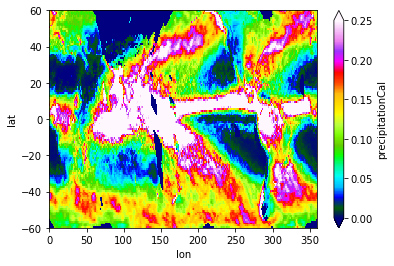

In [10]:
ds_mean.plot.imshow(vmin =0, vmax = 0.25, cmap = plt.get_cmap('gist_ncar'))

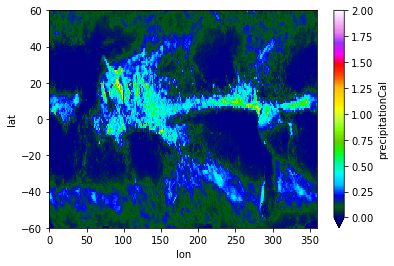

In [108]:
ds_mean.plot.imshow(vmin =0, vmax = 2, cmap = plt.get_cmap('gist_ncar'))

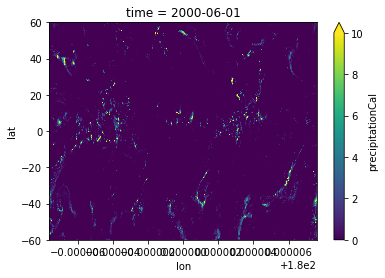

In [87]:
ds.isel(time = 0)['precipitationCal'].plot.imshow(vmin =0, vmax = 10)

In [91]:
ds['precipitationCal']

<xarray.DataArray 'precipitationCal' (lat: 1200, lon: 3600, time: 17520)>
dask.array<getitem, shape=(1200, 3600, 17520), dtype=float32, chunksize=(1200, 3600, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -59.95 -59.85 -59.75 -59.65 ... 59.75 59.85 59.95
  * lon      (lon) float32 180.05 180.15 180.25 180.35 ... 179.75 179.85 179.95
  * time     (time) datetime64[ns] 2000-06-01 ... 2001-05-31T23:30:00

In [89]:

mu_season, sigma_season, ampl_season, phase_season = diurnal_analysis(ds, 
                                                                      field_id = 'precipitationCal', 
                                                                      grid_time_resolution_hours = 0.5,
                                                                      time_resolution_hours = 1)

DJF


MemoryError: Unable to allocate 139. GiB for an array with shape (1200, 3600, 4320) and data type float64

In [ ]:
make_four_panel(mu_season , 
                cmap = plt.get_cmap('bwr'),
                vmax = 0.0001,
                title = r'$\mu$',)
#                 axis = plt.axis([220, 300, 10, 50]), 
#                 save_fig_path= save_figs_dir + 'GFDL_CM4_means_pr.png')

In [ ]:
make_four_panel(sigma_season , 
                vmax = 0.00003,
#                 vmin = 0, vmax = 10, 
                cmap = plt.get_cmap('bwr'),
                title = r'$\sigma$',)
#                 axis = plt.axis([220, 300, 10, 50]), 
#                 save_fig_path= save_figs_dir + 'GFDL_CM4_stds_pr.png')

In [ ]:
make_four_panel(ampl_season , 
                vmax = 0.00003, 
                cmap = plt.get_cmap('bwr'),
                title = r'$A$',)
#                 axis = plt.axis([220, 300, 10, 50]), 
#                 save_fig_path= save_figs_dir + 'GFDL_CM4_ampl_pr.png')

In [ ]:
make_four_panel(phase_season , 
                vmin = 0, vmax = 24, 
                cmap = plt.get_cmap('twilight'),
                title = r'$\Phi$',)
#                 axis = plt.axis([220, 300, 10, 50]), 
#                 save_fig_path= save_figs_dir + 'GFDL_CM4_phase_pr.png')